In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

data = np.genfromtxt('/home/itibcn/Desktop/MachineLearningClassic/Practica/IntroNumpy/apple_quality.csv', delimiter=',', skip_header=True)

print("Tamany de les dades:", data.shape)
print("Numero de files:", len(data))
#print(data)

#data2 = np.delete(data,(0),0)
#print(data2)
#Canviar good i bad per 0, i cambiar tot a float ".astype(float)"
#data_sense_nums = np.delete(data,(8),1)

#X
apple_sense_text = np.delete(data, (-1),1)

#apple_good_bad = np.delete(data,(0,1,2,3,4,5,6,7),1)

#print(apple_good_bad)

#Columna 8 de l'arxiu
data = np.genfromtxt('/home/itibcn/Desktop/MachineLearningClassic/Practica/IntroNumpy/apple_quality.csv', delimiter=',', skip_header=True, dtype=str)
#Y
columna_8 = data[:, 8]
print(columna_8)

#-------------------------------------------------------------------------
#Llista on volcarem les dades sense text
apple_llista_good_bad= []

#Triem la fila 8 on hi han els valors "good" y "bad"
for val in columna_8:
    if val == 'good':
        apple_llista_good_bad.append(1.0)
        #print(val)
    elif val == 'bad':
        #print(val)
        apple_llista_good_bad.append(0.0)
    else:
        try:
            # Intentar convertir el valor a float
            apple_llista_good_bad.append(float(val))
            #print(val)
        except ValueError:
            # Si el valor no es numèric, asignar NaN
            print(str(data[:,8]))
            apple_llista_good_bad.append(np.nan)

#-------------------------------------------------------------------------
#print(apple_llista_good_bad)

apple_good_bad = np.array(apple_llista_good_bad, dtype = np.float32)
#print(apple_good_bad)

for x in apple_sense_text:
    #print(apple_sense_text)
    break

print("X")
print(apple_sense_text)
print("Y")
print(apple_good_bad)

X_train, X_test, y_train, y_test = train_test_split(apple_sense_text, columna_8, test_size=0.3)

#Mesures de les X,Y separades 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

array_2d = columna_8.reshape(-1, 1)  # Convertir el vector en una matriu d'una columna

#print(X_train)
#print(y_train)
#data_numeros = np.delete(data,(0),0)
#data_numeros = np.delete(data_numeros,(1,),1)
#print(data_numeros)

Tamany de les dades: (4000, 9)
Numero de files: 4000
['good' 'good' 'bad' ... 'bad' 'good' 'good']
X
[[ 0.00000000e+00 -3.97004852e+00 -2.51233638e+00 ...  1.84490036e+00
   3.29839797e-01 -4.91590483e-01]
 [ 1.00000000e+00 -1.19521719e+00 -2.83925653e+00 ...  8.53285795e-01
   8.67530082e-01 -7.22809367e-01]
 [ 2.00000000e+00 -2.92023862e-01 -1.35128199e+00 ...  2.83863551e+00
  -3.80333280e-02  2.62163647e+00]
 ...
 [ 3.99700000e+03 -2.63451530e+00 -2.13824672e+00 ...  2.19970859e+00
   4.76385918e+00 -1.33461139e+00]
 [ 3.99800000e+03 -4.00800374e+00 -1.77933711e+00 ...  2.16143512e+00
   2.14488384e-01 -2.22971981e+00]
 [ 3.99900000e+03  2.78539650e-01 -1.71550503e+00 ...  1.26667740e+00
  -7.76571470e-01  1.59979646e+00]]
Y
[1. 1. 0. ... 0. 1. 1.]
(2800, 8)
(2800,)
(1200, 8)
(1200,)


In [226]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier

print(X_train.shape)
print(y_train.shape)
print(y_test.shape)


classificador = RandomForestClassifier()

classificador.fit(X_train, y_train)

y_pred = classificador.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

(2800, 8)
(2800,)
(1200,)
0.8841666666666667


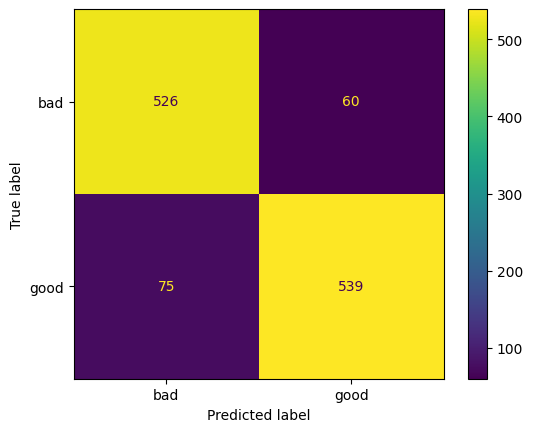

In [215]:
## Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(classificador, X_test, y_test)


In [ ]:
## Use Select KBest to select N amount of features.
## test this features using the same classifier you used
from sklearn.feature_selection import SelectKBest

reductor_dimensionalitats = SelectKBest(k=7)
reductor_dimensionalitats.fit(X_train, y_train)

X_train_3d = reductor_dimensionalitats.transform(X_train)
X_test_3d = reductor_dimensionalitats.transform(X_test)



AttributeError: 'SelectKBest' object has no attribute 'shape'

In [221]:
# Train classifier with selected features

classificador = RandomForestClassifier()

classificador.fit(X_train_3d, y_train)

y_pred = classificador.predict(X_test_3d)

acc = accuracy_score(y_test, y_pred)
print(acc)



0.855


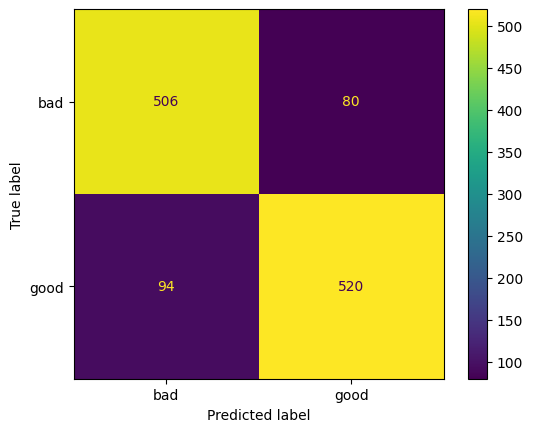

In [222]:
## Let's visualize these features
ConfusionMatrixDisplay.from_estimator(classificador, X_test_3d, y_test)